# 1. LIBRARY IMPORT

Starting off, it's needed to have all the necessary libraries available for this proccess, which can be done with:

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 2. DATA LOADING

**Training Values**: These are the features you'll use to train a model. There are 38 features, including structual information such as the number of floors (before the earthquake), age of the building, and type of foundation, as well as legal information such as ownership status, building use, and the number of families who live there. Each building is identified by a unique (random) building_id, which you can use as an index.

In [2]:
!wget https://github.com/alan-flint/Richter-DrivenData/raw/master/input/train_values.csv
df_train_values= pd.read_csv("train_values.csv", index_col = "building_id")

df_train_values.shape

--2022-12-18 19:54:30--  https://github.com/alan-flint/Richter-DrivenData/raw/master/input/train_values.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/train_values.csv [following]
--2022-12-18 19:54:30--  https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/train_values.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23442727 (22M) [text/plain]
Saving to: ‘train_values.csv’

train_values.csv    100%[===================>]  22.36M  --.-KB/s    in 0.05s   

2022-12-18 19:54:30 (423 MB/s) - ‘train_values.csv’ saved [23442727

(260601, 38)

The variables available are as follows:

In [3]:
df_train_values.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

These are the labels. Every building_id in the training values data has a corresponding label in this file. A  1  represents low damage, a  2  represents a medium amount of damage, and a  3  represents almost complete destruction.

In [4]:
!wget https://github.com/alan-flint/Richter-DrivenData/raw/master/input/train_labels.csv
df_train_labels = pd.read_csv("train_labels.csv", index_col = "building_id")

df_train_labels.head()

--2022-12-18 19:54:41--  https://github.com/alan-flint/Richter-DrivenData/raw/master/input/train_labels.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/train_labels.csv [following]
--2022-12-18 19:54:41--  https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/train_labels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2330792 (2.2M) [text/plain]
Saving to: ‘train_labels.csv’

train_labels.csv    100%[===================>]   2.22M  --.-KB/s    in 0.01s   

2022-12-18 19:54:41 (209 MB/s) - ‘train_labels.csv’ saved [2330792/

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


Joining the train labels into the train_values to work with both together

In [5]:
df_train_values.join(df_train_labels)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,...,0,0,0,0,0,0,0,0,0,2
669485,17,715,2060,2,0,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
602512,17,51,8163,3,55,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,3


# 3. EXPLORATORY DATA ANALYSIS

We use this to see the total number and proportions of damaged buildings for each damage grade possible.

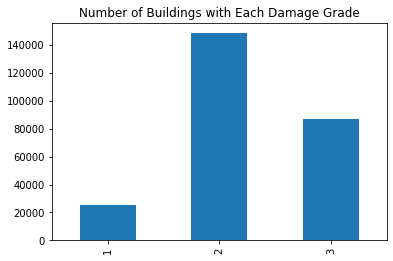

In [6]:
(df_train_labels.damage_grade
             .value_counts()
             .sort_index()
             .plot.bar(title="Number of Buildings with Each Damage Grade"))

# 4. FEATURE SELECTION

We create a subset with the selected features from the dataset, those being the following:

In [7]:
selected_features = ['foundation_type', 
                     'area_percentage', 
                     'height_percentage',
                     'count_floors_pre_eq',
                     'land_surface_condition',
                     'has_superstructure_cement_mortar_stone']

df_train_values_subset = df_train_values[selected_features]

We can also see the relationship plot for all the numeric features and labels with a pairplot

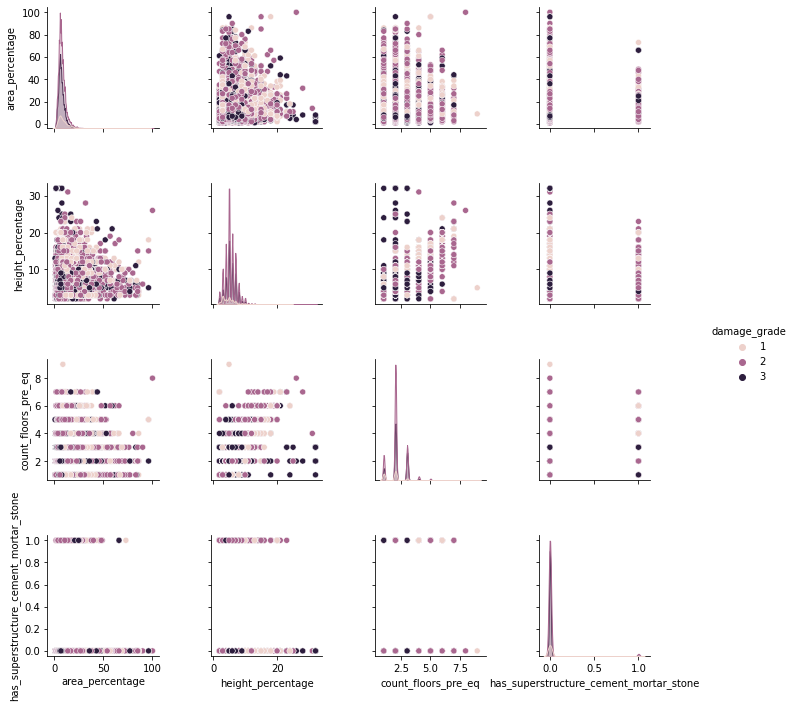

In [10]:
sns.pairplot(df_train_values_subset.join(df_train_labels), 
             hue='damage_grade')

For the categorical variables on the set, we transform then with OneHotEncoding (get_dummies)

In [11]:
df_train_values_subset = pd.get_dummies(df_train_values_subset)
df_train_values_subset.head()

,area_percentage,height_percentage,count_floors_pre_eq,has_superstructure_cement_mortar_stone,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t
building_id,,,,,,,,,,,,
802906,6,5,2,0,0,0,1,0,0,0,0,1
28830,8,7,2,0,0,0,1,0,0,0,1,0
94947,5,5,2,0,0,0,1,0,0,0,0,1
590882,6,5,2,0,0,0,1,0,0,0,0,1
201944,8,9,3,0,0,0,1,0,0,0,0,1


# 5. DATA PRE-PROCESSING

For this, we split the model in values X and Y, for train values and test values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_values_subset, df_train_labels.damage_grade,
                                                random_state=1)

# 6. DATA MODELLING

## Modelling using NaiveBayes



In [21]:
from sklearn.naive_bayes import ComplementNB # 1. choose model class
modelNaive = ComplementNB()                       # 2. instantiate model
modelNaive.fit(X_train, y_train)                  # 3. fit model to data
y_modelNaive = modelNaive.predict(X_test) 

**Preevaluation**


> The metric for the competitions is $F1-score$, which balances the precision and recall of a classifier. We will use a variant called the micro averaged  $F1-score$.



In [14]:
from sklearn.metrics import f1_score
f1_score(y_test, y_modelNaive, average='micro')

0.371859219351967

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_modelNaive, labels=modelNaive.classes_))

              precision    recall  f1-score   support

           1       0.25      0.64      0.36      6238
           2       0.64      0.09      0.15     37210
           3       0.39      0.78      0.52     21703

    accuracy                           0.37     65151
   macro avg       0.42      0.50      0.34     65151
weighted avg       0.52      0.37      0.29     65151



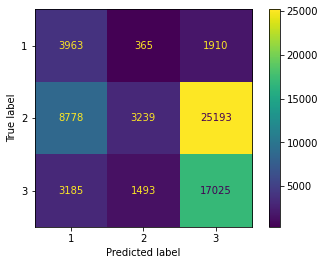

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_modelNaive, labels=modelNaive.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelNaive.classes_)
disp.plot()

## Modelling using kNN

In [27]:
# rest index avoid problems in cross validation
X_train.reset_index(drop = True, inplace = True)
X_train.head()

,area_percentage,height_percentage,count_floors_pre_eq,has_superstructure_cement_mortar_stone,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t
0,10,10,4,0,0,0,1,0,0,0,0,1
1,6,5,2,1,0,0,0,0,1,0,0,1
2,8,6,3,0,0,0,1,0,0,0,0,1
3,13,7,3,0,0,0,1,0,0,0,1,0
4,8,5,2,0,0,0,1,0,0,0,0,1


Euclidean metric for kNN method

Min Value uniform : 0.48911230493732405 (91)
Min Value distance : 0.49046108144633255 (256)


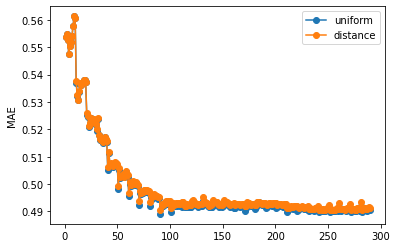

In [28]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = KFold(n_splits = 10, shuffle = False)

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, metric='euclidean')
       for train_fold, test_fold in cv.split(X_train):
          # train
          fx_train = X_train.iloc[train_fold]
          fy_train = y_train.iloc[train_fold]
          # test
          fx_test = X_train.iloc[test_fold]
          fy_test = y_train.iloc[test_fold]
          # training and execution
          knn.fit( X = fx_train, y = fy_train)
          y_pred = knn.predict(X = fx_test)
          # evaluación del modelo
          mae = mean_absolute_error(fy_test, y_pred)
          fold_accuracy.append(mae)
          total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 



> Prediction

Done after finding the best parametrization possible



In [36]:
# constructor
n_neighbors = 97
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 

# fit and predict
knn.fit( X = X_train, y = y_train)
y_pred = knn.predict(X = X_test)

# Errors
from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 0.49020269644807696
MAPE: 0.22213191148744607
MSE: 0.31928521572013485
R^2: -4.483001085052883




> Prediction Visualization



/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


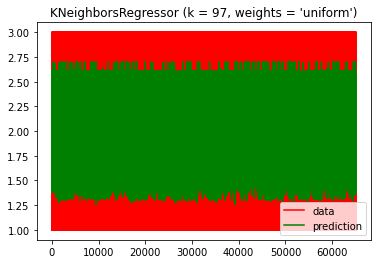

In [37]:
from sklearn.metrics import mean_absolute_error

# x axis for plotting
import numpy as np

xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')

#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.show()

## Decision Trees

Min Value uniform : 0.49325458991335713 (7)


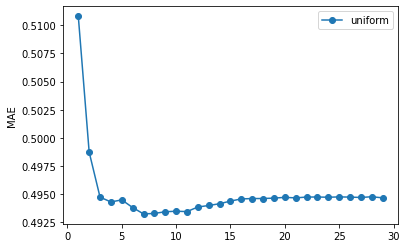

In [38]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn import tree

cv = KFold(n_splits = 10, shuffle = False)

total_scores = []
for i in range(1,30):
    fold_accuracy = []
    dt = tree.DecisionTreeRegressor(max_depth=i)
    for train_fold, test_fold in cv.split(X_train):
      # División train test aleatoria
      # train
      fx_train = X_train.iloc[train_fold]
      fy_train = y_train.iloc[train_fold]
      # test
      fx_test = X_train.iloc[test_fold]
      fy_test = y_train.iloc[test_fold]

      # entrenamiento y ejecución del modelo
      dt.fit( X = fx_train, y = fy_train)
      y_pred = dt.predict(X = fx_test)
      # evaluación del modelo
      mae = mean_absolute_error(fy_test, y_pred)
      fold_accuracy.append(mae)
    total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

plt.plot(range(1,len(total_scores)+1), total_scores, 
          marker='o', label=weights)
print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
plt.ylabel('MAE')      
    

plt.legend()
plt.show() 



> Model construction



In [40]:
regressor = tree.DecisionTreeRegressor(criterion='mse', max_depth=7, random_state=0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=7, random_state=0)

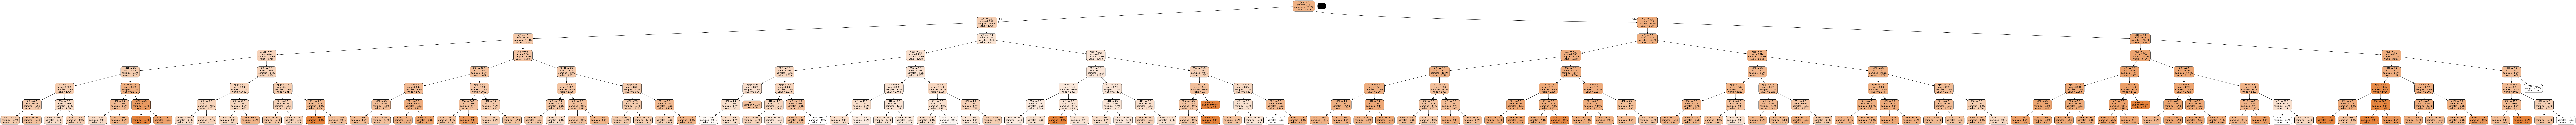

In [51]:
from IPython.display import Image
from sklearn import tree
from io import StringIO

# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

dot_data = StringIO()

tree.export_graphviz(regressor, out_file = dot_data, proportion = True, rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())



> Prediction



In [52]:
y_pred = dt.predict(X_test)


from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 0.49379089670606596
MAPE: 0.22512398274103027
MSE: 0.32439281348525123
R^2: -3.4159609222943494


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


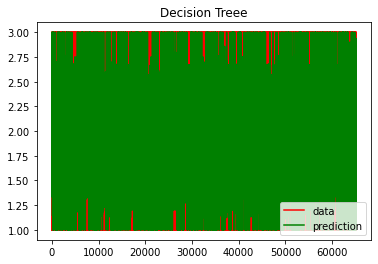

In [53]:
from sklearn.metrics import mean_absolute_error
                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("Decision Treee")

plt.show()

# 7. SUBMISSION FORMATTING

For the **final** $F1-micro-average$, we'll be using the class predictions, not the class probabilities. 

Let's load up the data, select the subset of features we used to train the model and create dummy variables, and see what we get on the leaderboard.


In [17]:
!wget https://github.com/alan-flint/Richter-DrivenData/raw/master/input/test_values.csv
test_values = pd.read_csv('test_values.csv', index_col='building_id')
test_values_subset = test_values[selected_features]
test_values_subset = pd.get_dummies(test_values_subset)

--2022-12-18 20:12:04--  https://github.com/alan-flint/Richter-DrivenData/raw/master/input/test_values.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/test_values.csv [following]
--2022-12-18 20:12:04--  https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/test_values.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7815385 (7.5M) [text/plain]
Saving to: ‘test_values.csv’

test_values.csv     100%[===================>]   7.45M  --.-KB/s    in 0.02s   

2022-12-18 20:12:04 (302 MB/s) - ‘test_values.csv’ saved [7815385/78153

**Make Predictions**: Note that we use the class predictions, not the class probabilities.

In [23]:
predictionsNaive = modelNaive.predict(test_values_subset)

In [55]:
y_pred = knn.predict(X = X_test)

**Save Submission**

> We can use the column name and index from the submission format to ensure our predictions are in the form.



In [25]:
!wget https://github.com/alan-flint/Richter-DrivenData/raw/master/input/submission_format.csv
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')
my_submissionNaive = pd.DataFrame(data=predictionsNaive,
                             columns=submission_format.columns,
                             index=submission_format.index)
my_submissionNaive.head()

--2022-12-18 21:29:53--  https://github.com/alan-flint/Richter-DrivenData/raw/master/input/submission_format.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/submission_format.csv [following]
--2022-12-18 21:29:53--  https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/submission_format.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 777012 (759K) [text/plain]
Saving to: ‘submission_format.csv.2’

submission_format.c 100%[===================>] 758.80K  --.-KB/s    in 0.01s   

2022-12-18 21:29:53 (70.5 MB/s) - ‘submission_

,damage_grade
building_id,
300051,3
99355,1
890251,3
745817,1
421793,3


In [59]:
!wget https://github.com/alan-flint/Richter-DrivenData/raw/master/input/submission_format.csv
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')
my_submissionkNN = pd.DataFrame(data=y_pred)
my_submissionkNN.head()

--2022-12-18 23:03:57--  https://github.com/alan-flint/Richter-DrivenData/raw/master/input/submission_format.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/submission_format.csv [following]
--2022-12-18 23:03:58--  https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/submission_format.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 777012 (759K) [text/plain]
Saving to: ‘submission_format.csv.5’

submission_format.c 100%[===================>] 758.80K  --.-KB/s    in 0.007s  

2022-12-18 23:03:58 (104 MB/s) - ‘submission_f

,0
0,2.309278
1,2.288660
2,2.278351
3,2.340206
4,2.474227


In [26]:
my_submissionNaive.to_csv('submissionNaive.csv')

In [60]:
my_submissionkNN.to_csv('submissionkNN.csv')